# Logistic Regression

* Model training and predictions are relatively fast
* No tuning is usually needed for logistic regression unless you want to regularize your model. 
* Finally, it can perform well with a small number of observations. 


## Import Libraries

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

## Load the Dataset
 The code below loads a modified version of the iris dataset which has two classes. A 1 is a virginica flower and a 0 is versicolor flower. 

In [10]:
df = pd.read_csv('C:/Users/Shree.Charran/Desktop/Perso/Practise/Completed/ML- Scikit/data/modifiedIris2Classes.csv')

In [11]:
df.shape

(100, 5)

## Splitting Data into Training and Test Sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [13]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [14]:
#from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. Typically this is where you tune C is related to regularization

In [15]:
clf = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [16]:
clf.fit(X_train, y_train)

LogisticRegression()

<b>Step 4:</b> Predict the labels of new data (new flowers)

Logistic regression also allows you to see prediction probabilities as well as  a prediction. This is not like other algorithms like decision trees for classification which only give you a prediction not a probability. 

In [17]:
# One observation's petal length after standardization
X_test[0].reshape(1,-1)

array([[-0.12093628]])

In [18]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction 0
probability [[0.52720087 0.47279913]]


If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data!

In [19]:
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values
example_df['logistic_preds'] = pd.DataFrame(clf.predict_proba(X_test))[1]

In [20]:
example_df.head()

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926


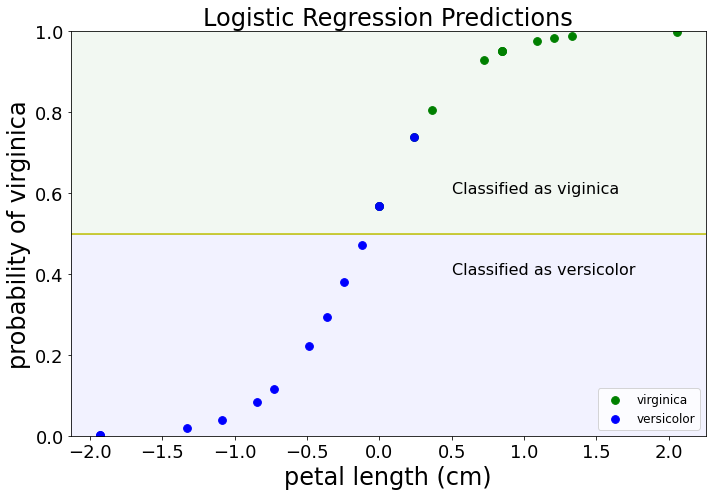

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal length (cm)', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


## Measuring Model Performance

In [22]:
score = clf.score(X_test, y_test)
print(score)

0.88


Accuracy is one metric, but it doesn't say give much insight into what was wrong. Let's look at a confusion matrix

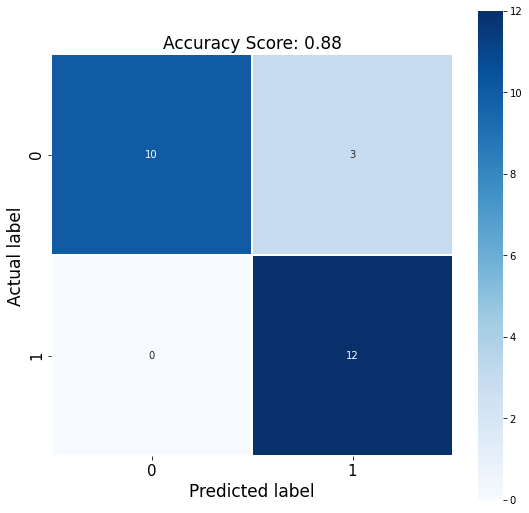

In [23]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)